In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting matplotlib
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 1.5 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/8.0 MB 1.5 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.0 MB 1.3 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.0 MB 1.3 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.0 MB 1.4 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.0 MB 1.5 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.0 MB 1.5 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.0 MB 1.4 MB/s eta 0:00:05
   ------------- -------------------------- 2.6/8.0 MB 1.4 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.0 MB 1.3 MB/s eta 0:00:04
   ------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Matplotlib is building the font cache; this may take a moment.


In [4]:
parkinsons_dataset = pd.read_csv("C:\\Users\\lenovo\\Downloads\\parkinsons.csv")

In [5]:
parkinsons_dataset = parkinsons_dataset.drop('name', axis=1)  

In [6]:
X = parkinsons_dataset.drop('status', axis=1)  # Features
y = parkinsons_dataset['status']

In [9]:
print("Data Shape:", parkinsons_dataset.shape)
print("Parkinson's Disease Samples:", len(parkinsons_dataset[parkinsons_dataset['status'] == 1]))
print("Healthy Samples:", len(parkinsons_dataset[parkinsons_dataset['status'] == 0]))
print("\nData Summary:")
print(parkinsons_dataset.describe())

Data Shape: (195, 23)
Parkinson's Disease Samples: 147
Healthy Samples: 48

Data Summary:
       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min    

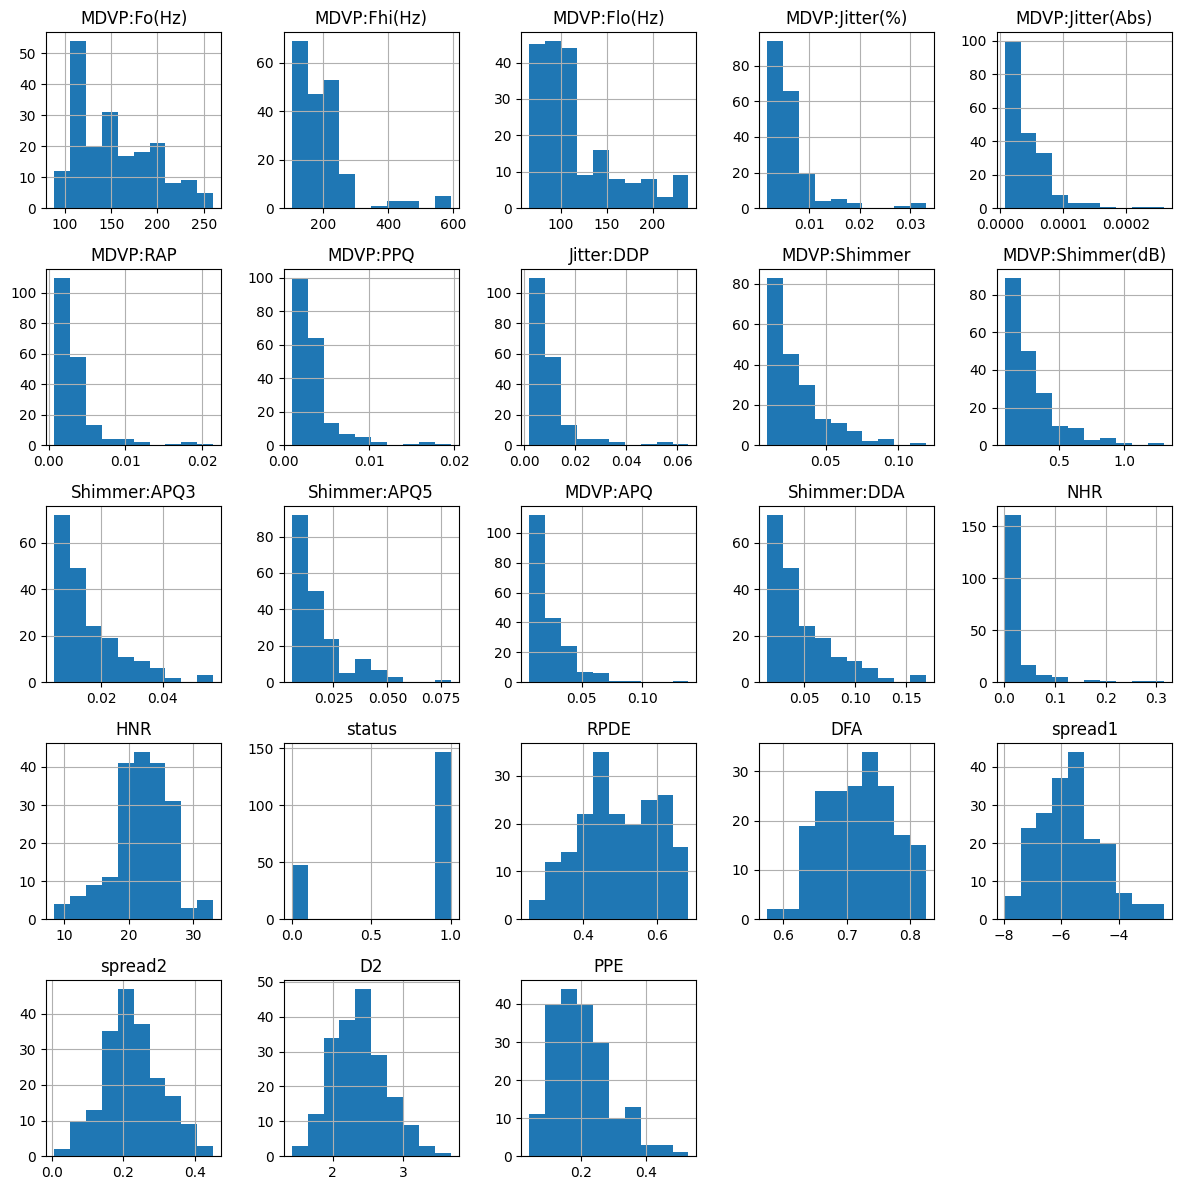

In [10]:
parkinsons_dataset.hist(figsize=(12, 12))
plt.tight_layout()
plt.show()

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.9487179487179487


In [17]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[ 5  2]
 [ 0 32]]


In [19]:
import pickle
filename = 'parkinsons_model.sav'
pickle.dump(rf_classifier, open(filename, 'wb'))